In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import matplotlib

In [48]:
bank_data = pd.read_csv('dataset/bank_data.csv')

bank_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [49]:
bank_data = bank_data.drop(['Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis = 1)

In [50]:
bank_data.columns

Index(['Age', 'Income', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [51]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [52]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [53]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [54]:
bank_data.to_csv('dataset/bank_data_processed.csv', index = False)

Text(0, 0.5, 'Age')

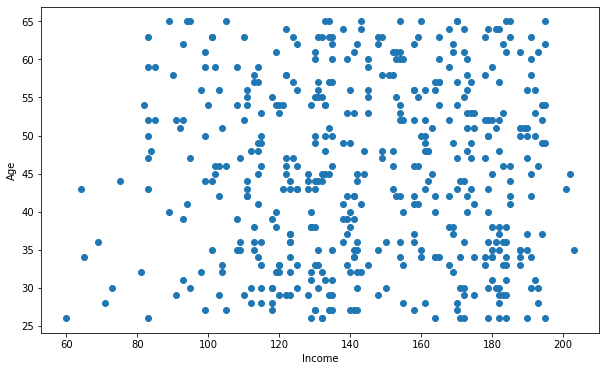

In [55]:
plt.figure(figsize = (10, 6))
plt.scatter(bank_data['Income'], bank_data['Age'])

plt.xlabel('Income')
plt.ylabel('Age')

<AxesSubplot:xlabel='CreditCard', ylabel='Income'>

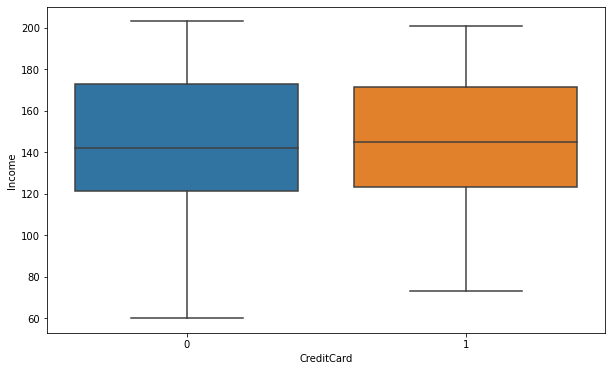

In [56]:
plt.figure(figsize = (10, 6))
sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

<AxesSubplot:xlabel='CreditCard', ylabel='Mortgage'>

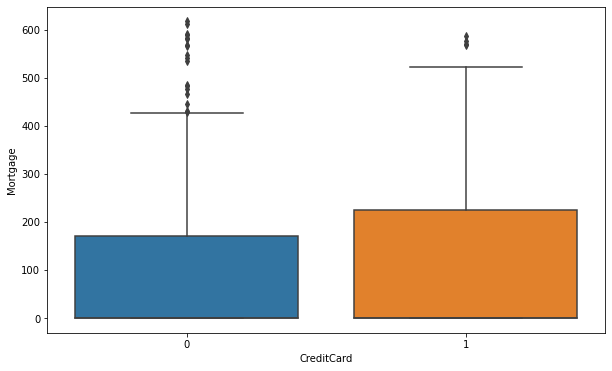

In [57]:
plt.figure(figsize = (10, 6))
sns.boxplot(bank_data['CreditCard'], bank_data['Mortgage'])

<AxesSubplot:xlabel='Family', ylabel='count'>

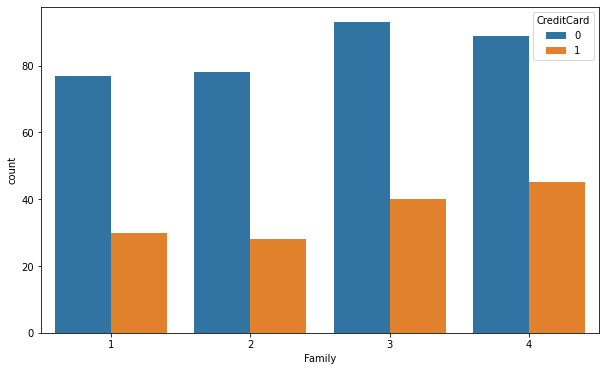

In [58]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Family', data = bank_data, hue = 'CreditCard')

<AxesSubplot:xlabel='Education', ylabel='count'>

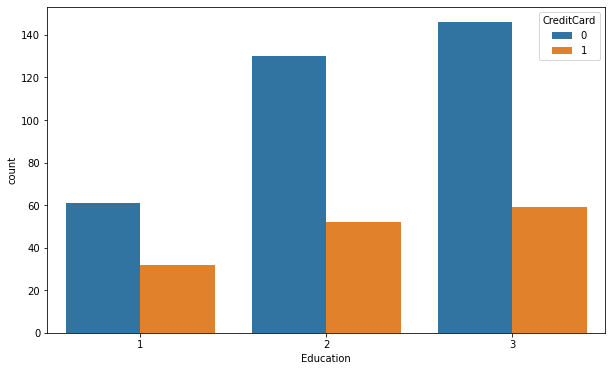

In [59]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Education', data = bank_data, hue = 'CreditCard')

In [60]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


<AxesSubplot:>

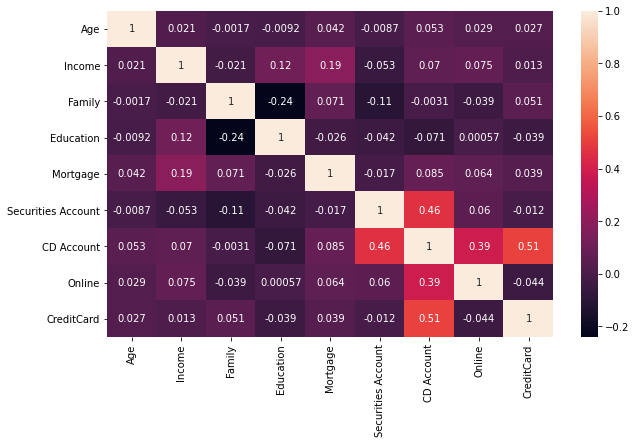

In [61]:
plt.figure(figsize = (10, 6))
sns.heatmap(bank_data_corr, annot = True)

In [62]:
x = bank_data.drop('CreditCard', axis = 1)
y = bank_data['CreditCard']

In [63]:
x.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online
0,34,180,1,3,0,0,0,0
1,38,130,4,3,134,0,0,0
2,46,193,2,3,0,0,0,0
3,38,119,1,2,0,0,1,1
4,42,141,3,3,0,1,1,1


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [65]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
log_clf = LogisticRegression(C= 1, solver = 'liblinear')

svc_clf = SVC(C = 1, kernel = 'linear', gamma = 'auto')

naive_clf = GaussianNB()

In [67]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.75


In [68]:
voting_clf_hard = VotingClassifier(estimators = [('lr', log_clf),
                                                 ('svc', svc_clf),
                                                 ('naive', naive_clf)
                                                ], 
                                   voting     = 'hard')

In [69]:
voting_clf_hard.estimators

[('lr', LogisticRegression(C=1, solver='liblinear')),
 ('svc', SVC(C=1, gamma='auto', kernel='linear')),
 ('naive', GaussianNB())]

In [70]:
voting_clf_hard.named_estimators

{'lr': LogisticRegression(C=1, solver='liblinear'),
 'svc': SVC(C=1, gamma='auto', kernel='linear'),
 'naive': GaussianNB()}

In [71]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc', SVC(C=1, gamma='auto', kernel='linear')),
                             ('naive', GaussianNB())])

In [72]:
y_pred = voting_clf_hard.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.8229166666666666

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        68
           1       0.92      0.43      0.59        28

    accuracy                           0.82        96
   macro avg       0.87      0.71      0.74        96
weighted avg       0.84      0.82      0.80        96



In [75]:
print(confusion_matrix(y_test, y_pred))

[[67  1]
 [16 12]]


In [76]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.75
VotingClassifier 0.8229166666666666


In [77]:
y_pred_probs = log_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.2409549 , 0.7590451 ],
       [0.94331814, 0.05668186],
       [0.67238233, 0.32761767],
       [0.94704547, 0.05295453],
       [0.95462526, 0.04537474],
       [0.77064677, 0.22935323],
       [0.95433884, 0.04566116],
       [0.80193847, 0.19806153],
       [0.76048158, 0.23951842],
       [0.94292031, 0.05707969]])

In [80]:
y_pred_probs = naive_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.15916908, 0.84083092],
       [0.92682309, 0.07317691],
       [0.10348325, 0.89651675],
       [0.91979407, 0.08020593],
       [0.8762652 , 0.1237348 ],
       [0.92579962, 0.07420038],
       [0.83400715, 0.16599285],
       [0.59398264, 0.40601736],
       [0.85074212, 0.14925788],
       [0.93230867, 0.06769133]])

In [83]:
svc_clf_soft = SVC(C = 1, kernel = 'linear', gamma = 'auto', probability = True)
svc_clf_soft.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [84]:
y_pred_probs = svc_clf_soft.predict_proba(x_test)

y_pred_probs[:10]

array([[0.13843334, 0.86156666],
       [0.9518644 , 0.0481356 ],
       [0.8031626 , 0.1968374 ],
       [0.95186994, 0.04813006],
       [0.95184455, 0.04815545],
       [0.80318291, 0.19681709],
       [0.99034326, 0.00965674],
       [0.80297402, 0.19702598],
       [0.80303319, 0.19696681],
       [0.95187031, 0.04812969]])

In [85]:
voting_clf_soft = VotingClassifier(estimators = [('lr' , log_clf),
                                                 ('svc', svc_clf_soft),
                                                 ('naive', naive_clf)],
                                  voting = 'soft',
                                  weights = [0.4, 0.3, 0.3])

In [86]:
voting_clf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc',
                              SVC(C=1, gamma='auto', kernel='linear',
                                  probability=True)),
                             ('naive', GaussianNB())],
                 voting='soft', weights=[0.4, 0.3, 0.3])

In [87]:
y_pred = voting_clf_soft.predict_proba(x_test)

In [90]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
SVC 0.8229166666666666
GaussianNB 0.75
VotingClassifier 0.8229166666666666
